In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

The dataset is from https://www.kaggle.com/ankurbajaj9/obesity-levels 
The datset is "Obesity based on eating habits & physical cond.
Obesity in individuals from Colombia, Peru and Mexico"

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [18]:
#check any null values in the dataset
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [20]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [6]:
#convert object values to float values
cate_var = ['Gender', 'family_history_with_overweight', 'FAVC', 
            'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
le = LabelEncoder()
#apply the encoder
l_df = df[cate_var].apply(le.fit_transform)
l_df.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,1,0,2,0,0,3,3,1
1,0,1,0,2,1,1,2,3,1
2,1,1,0,2,0,0,1,3,1
3,1,0,0,2,0,0,1,4,5
4,1,0,0,2,0,0,2,3,6


In [7]:
df0 = l_df.join(df._get_numeric_data())
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   family_history_with_overweight  2111 non-null   int32  
 2   FAVC                            2111 non-null   int32  
 3   CAEC                            2111 non-null   int32  
 4   SMOKE                           2111 non-null   int32  
 5   SCC                             2111 non-null   int32  
 6   CALC                            2111 non-null   int32  
 7   MTRANS                          2111 non-null   int32  
 8   NObeyesdad                      2111 non-null   int32  
 9   Age                             2111 non-null   float64
 10  Height                          2111 non-null   float64
 11  Weight                          2111 non-null   float64
 12  FCVC                            21

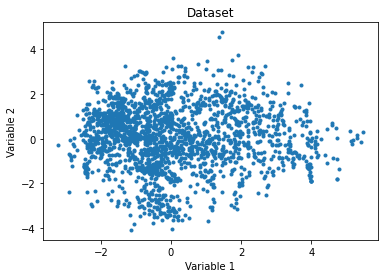

In [8]:
#Using PCA before K-means clustering reduces dimensions and decrease computation cost
scaler = StandardScaler()
n_df = scaler.fit_transform(df0)
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(n_df)
plt.plot(pca_df[:, 0], pca_df[:,1], '.')
plt.title('Dataset')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

Use WCSS ( Within-Cluster Sum of Square ) to find the optimal k
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow.

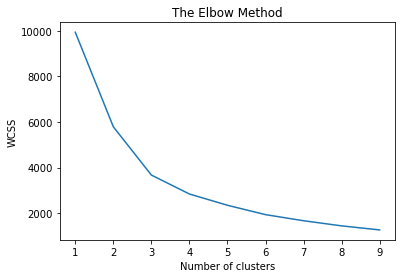

In [9]:
wcss_list = []

for i in range(1,10):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state = 100)
    kmeans_test.fit(pca_df)
    wcss_list.append(kmeans_test.inertia_)

plt.plot(range(1, 10), wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,10))
plt.ylabel('WCSS')
plt.show()

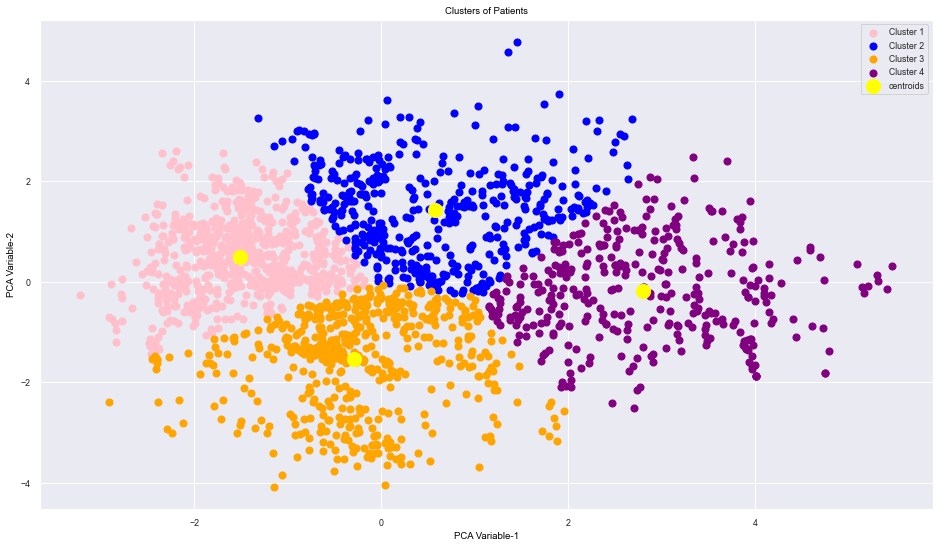

In [36]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(pca_df[y_pred == 0, 0], pca_df[y_pred == 0, 1], s= 50, c='pink', label = 'Cluster 1')
plt.scatter(pca_df[y_pred == 1, 0], pca_df[y_pred == 1, 1], s= 50, c='blue', label = 'Cluster 2')
plt.scatter(pca_df[y_pred == 2, 0], pca_df[y_pred == 2, 1], s= 50, c='orange', label = 'Cluster 3')
plt.scatter(pca_df[y_pred == 3, 0], pca_df[y_pred == 3, 1], s= 50, c='purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s= 200, c='yellow', label='centroids')
plt.title('Clusters of Patients', color='black')
plt.xlabel('PCA Variable-1', color='black')
plt.ylabel('PCA Variable-2', color='black')
plt.legend()
plt.show()

In [12]:
kmeans.cluster_centers_

array([[-0.29371288, -1.52661209],
       [-1.51774151,  0.49797173],
       [ 0.5678373 ,  1.43087803],
       [ 2.79130825, -0.17494743]])

In [38]:
kmeans = KMeans(n_clusters = 4, init= 'k-means++', random_state = 88).fit(pca_df)
y_pred = kmeans.fit_predict(pca_df)

In [13]:
df1 = pd.DataFrame(y_pred)
df1 = df1.join(df)
df1.head()

,0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,3,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,3,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,2,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Attributes related with eating habits are:

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

Attributes related with the physical condition are:

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS).

other attr:

GENDER

AGE

HEIGHT

WEIGHT


In [25]:
df2 = pd.DataFrame(y_pred)
df2 = df0.join(df2)
df2.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,0
0,0,1,0,2,0,0,3,3,1,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,3
1,0,1,0,2,1,1,2,3,1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,3
2,1,1,0,2,0,0,1,3,1,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,2
3,1,0,0,2,0,0,1,4,5,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2
4,1,0,0,2,0,0,2,3,6,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0


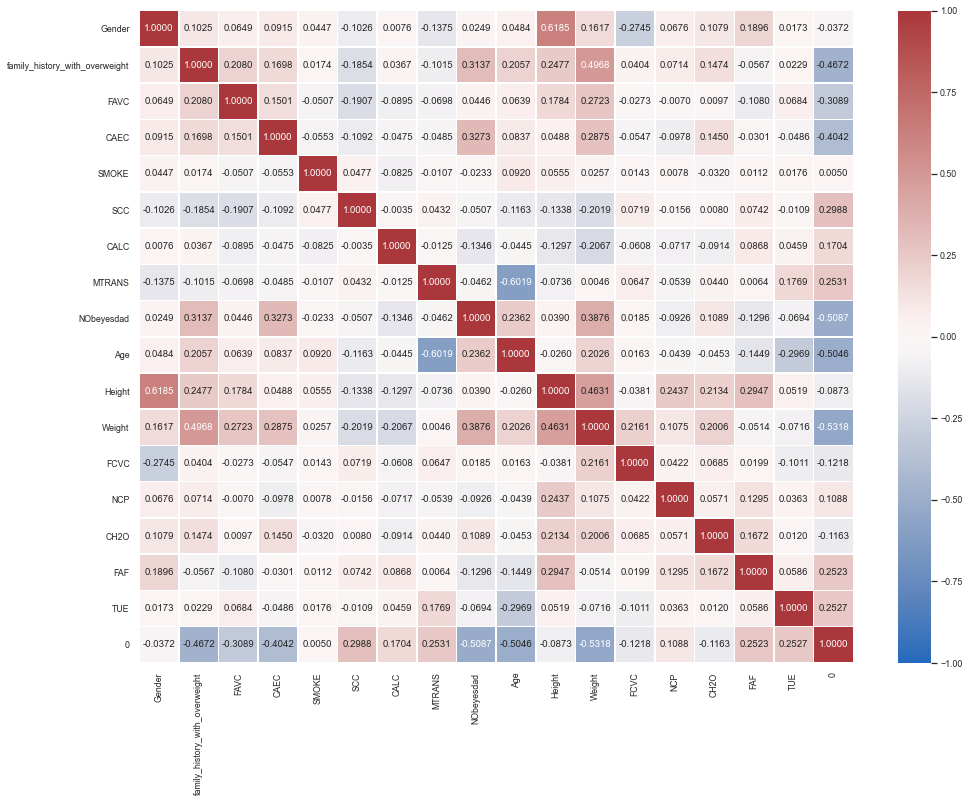

In [27]:
import seaborn as sns
df_corr = df2.corr()
sns.set(font_scale = 0.8)
plt.figure(figsize = (16,12))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax = 1, linewidths = .5, 
            cmap = sns.color_palette("vlag", as_cmap = True))
plt.show()


QUESTION 1: 
I would like to know how old people will concern about their healthy eating habit. In my assumption, at the young age, people don't care much about what food they consume. But they may start being conscious of what they eat in their late 20s and 30s, when the metabolism begins getting slow and their resilience isn't fast like before.
To answer this question, we examine two variables - 'Age' and 'FCVC' that is the frequency of comsumption of vegetables.

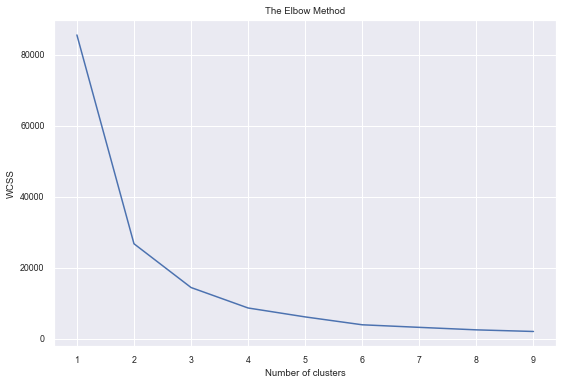

In [66]:
x = df1[['Age', 'FCVC']].values
wcss_list = []

for i in range(1,10):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 10), wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,10))
plt.ylabel('WCSS')
plt.show()

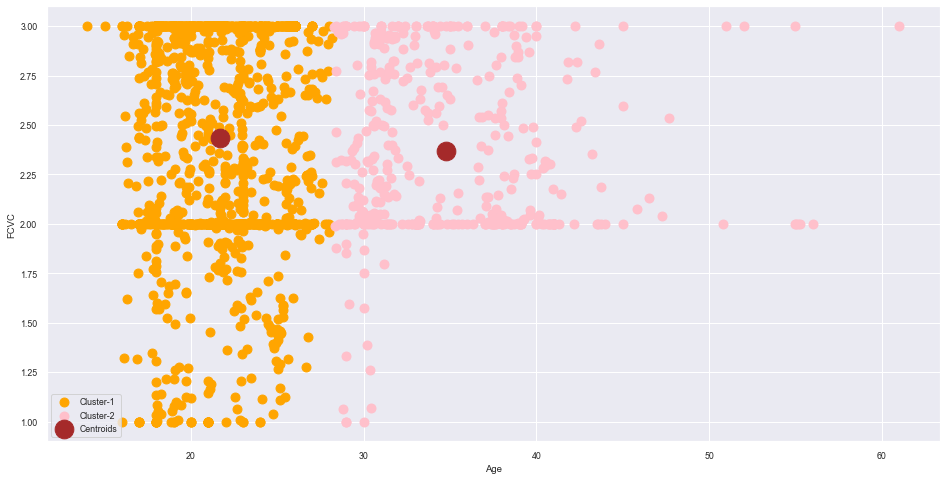

In [73]:
kmeans1 = KMeans(n_clusters = 2, init ='k-means++', random_state = 100)
y_kmeans = kmeans1.fit_predict(x)
# clusters visualization
plt.figure(1 , figsize = (16, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'pink', label = 'Cluster-2')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 350, c = 'brown', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('FCVC')
plt.legend()
plt.show()

The k-means clustering algorithm doesn't produce equally sized groups. 
The cluster 1 is the group of teenager and people in their 20s, and the cluster 2 is people in late 20s and 30s, some in 40s & 50s. The centroid of cluster 1 is sightly higher than the centroid of cluster 2, but both are in the range between 2.25 and 2.50
We can see that some people in cluster 1 consume vegetables less often than others in the same cluster, but people in cluster 2 eat vegetables often and the result is pretty uniformity.
However, my assumption is wrong, people at their young age or 30s & 40s consume vegetables often. The age doesn't affect to their frequency of comsumption of vegetables.

QUESTION 2:
I would like to see if people who spend much time of using technology devices will consume alcohol often, and does it affect to the weight?
For this question, I will examine the relationship of three variables - 'Weight', 'TUE' that is time using technology devies and 'CALC' that is consumption of alcohol. 

In [74]:
!pip install plotly
import plotly.express as px

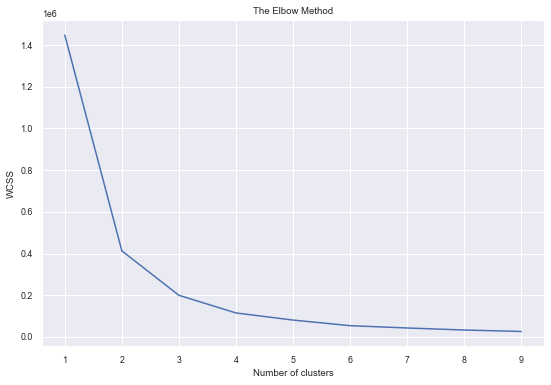

In [90]:
x2 = df2[['Weight','TUE','CALC']].values
x2_df = df2[['Weight','TUE','CALC']]

wcss_list = []

for i in range(1,10):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x2)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 10), wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,10))
plt.ylabel('WCSS')
plt.show()

In [84]:
import warnings
warnings.filterwarnings(action='ignore')
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 100)
clusters = kmeans2.fit_predict(x2_df)
x2_df['label'] = clusters

In [88]:
fig3d = px.scatter_3d(data_frame= x2_df, x= 'Weight', y = 'TUE', z = 'CALC', color = 'label',size = 'label')
fig3d.show()

**The 3D plot is attached on separate file. From the elbow method, I pick the optimal k is 4. 
Setting 4 clusters for this model and three variable, I use 3D plot so I can represent all values in one plot. 
The weight and the consumption of alcohol are definitely correlated from correlation matrix. However, there is no correlation between time using technology devices with other two variables. 

References:
    
Gopal, M. (2019). Applied machine learning. McGraw-Hill Education. ISBN-13-9781260456844

Bajaj, A. (2020). Obesity based on eating habits & physical cond. https://www.kaggle.com/ankurbajaj9/obesity-levels/metadata
    
Clustering algorithms. https://nms.kcl.ac.uk/colin.cooper/teachingmaterial/CSMWAL/CSMWAL/Lectures/ClusterSlides.pdf
